## Amy Hatman
## 10.2 Term Project: Final Project Submission
## June 1, 2024

### Milestone #1

### Narrative

Mental health is something that affects all of us but varies with each individual. What effect can music have on our mental health? Does it hinder or help? I am going to explore a dataset found on kaggle.com by user Catherine Rasgaitis. This data set was gathered via a survey of 736 individuals which asked about the individual’s musical tastes and preferences as well as their self-reported mental health status.

Can we use this dataset to build a model that can help predict the possibility of depression, anxiety, OCD, or insomnia based on our musical taste and other factors? Does a certain age have a higher change of mental illness, or a lower chance of music having an effect? Does streaming service used play a part? How important is the musical genre we prefer to listen to for our mental health? Can listening to music too much hurt rather than help?

I will explore how age, streaming service, favorite genre, time spent listening, and more can affect our mental health. The results could help prevent mental health issues and suicide by predicting who is at higher risk for mental illness based on provided demographics and musical information. 

My model will take an individual’s demographics and musical preferences and predict the likelihood they suffer from a potential mental illness. Streaming services could use this model to tailor ads to customers based on the music being played and how long it is played. One well timed ad on suicide prevention that saves just one life would be worth it.

### Graphical Analysis

In [1]:
## importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# using read_csv with pandas to create dataframe
mental_data = pd.read_csv("mxmh_survey_results.csv")
mental_data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### 1. Histogram of Age Distribution


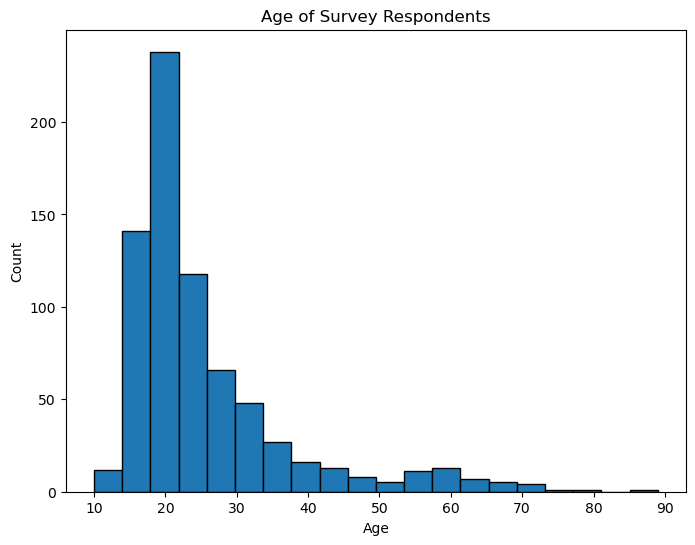

In [3]:
# plotting Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(mental_data['Age'], bins=20, edgecolor='black')
plt.title('Age of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

We can see that the majority of respondents are under the age of 30. This will affect the results of our model in that it may not be as accurrate for ages over 30 who had fewer respondents and, therefore, data.

### 2. Bar Chart of Prmiary Streaming Service


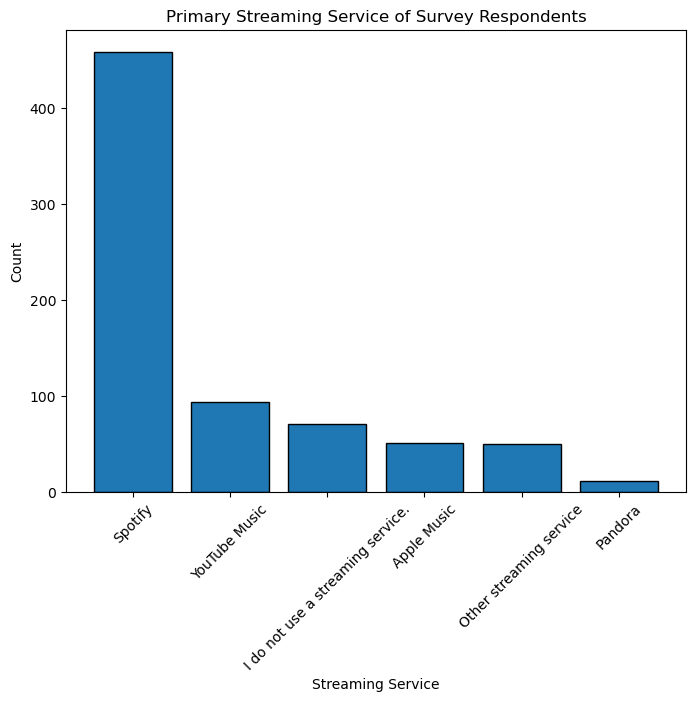

In [4]:
# getting count of primary streaming service
streaming_counts = mental_data['Primary streaming service'].value_counts()

# plotting Primary Streaming Service
plt.figure(figsize=(8, 6))
plt.bar(streaming_counts.index, streaming_counts.values,  edgecolor='black')
plt.title('Primary Streaming Service of Survey Respondents')
plt.xlabel('Streaming Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From this graph we can see that Spotify is the most popular streaming service for respondents. Pandora is the least popular. The streaming service provider is who could tailor ads based on the results of the model built.

### 3. Pie Chart of Musical Effect on Mental Health

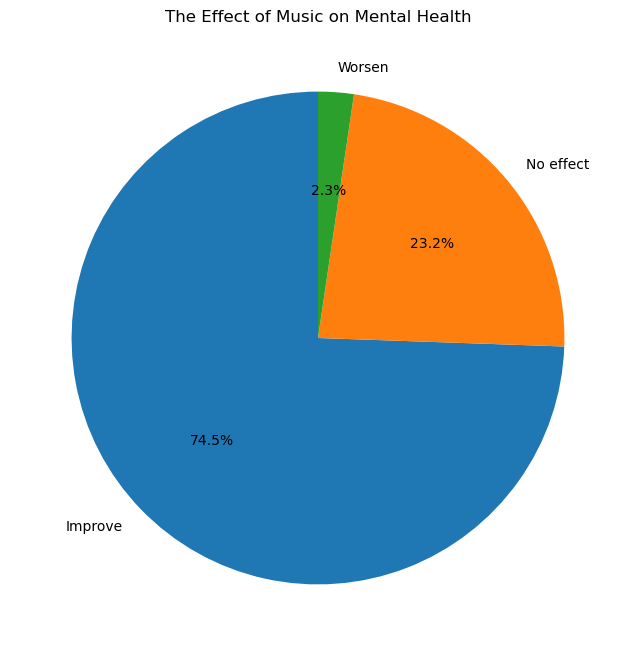

In [8]:
# getting the count for each response for music effects
effects = mental_data['Music effects'].value_counts()

# plotting the results in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(effects, labels=effects.index, autopct='%1.1f%%', startangle=90)
plt.title('The Effect of Music on Mental Health')
plt.show()

This pie chart shows that 74.5% of respondents belive that music helps improve mental health. Only 2.3% believe that it worsens mental health, with the remaining 23.2% feeling it has no effect at all.

### 4. Bar Graph of Favorite Genre and Anxiety Level

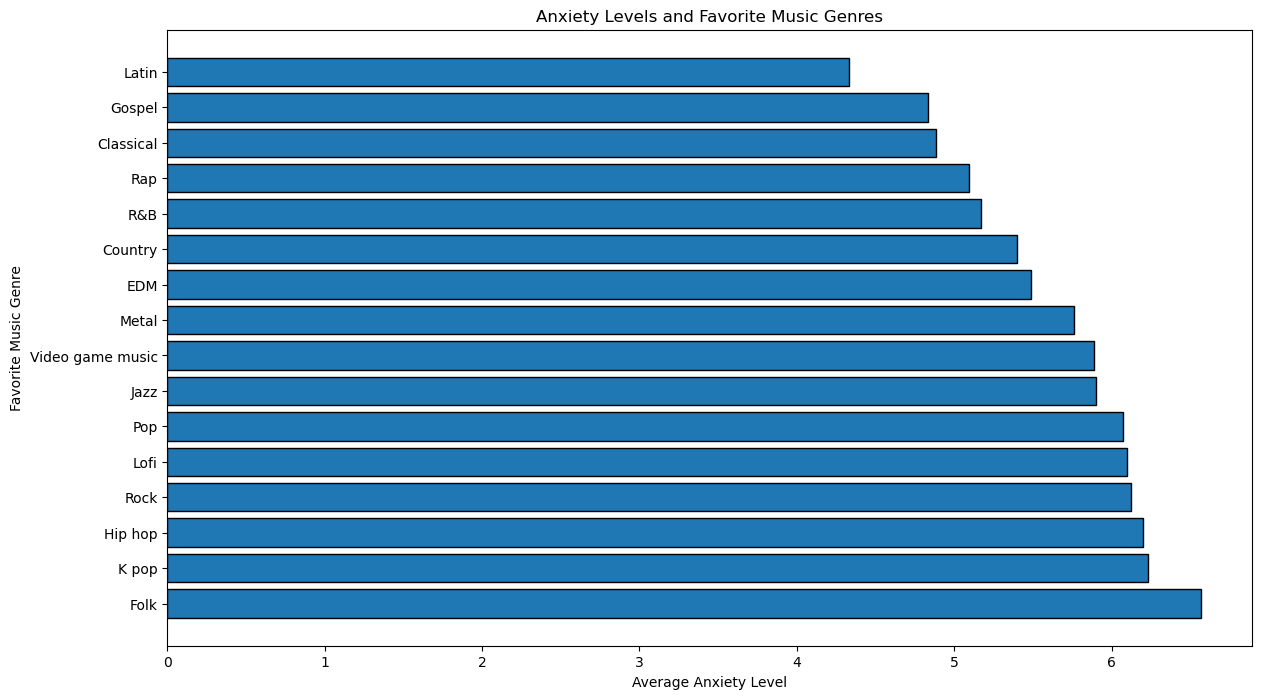

In [9]:
# grouping favorite genre by anxiety levels
anxiety = mental_data.groupby('Fav genre')['Anxiety'].mean().sort_values(ascending=False).reset_index()

# plotting a bar graph showing favorite genre and anxiety levels
plt.figure(figsize=(14, 8))
plt.barh(y='Fav genre', width='Anxiety', data=anxiety,  edgecolor='black')
plt.title('Anxiety Levels and Favorite Music Genres')
plt.xlabel('Average Anxiety Level')
plt.ylabel('Favorite Music Genre')
plt.show()

We see here that Latin music has the lowest relationship between anxiety levels and favorite music genre, while folk music has the highest! If one feels anxious, they should consider trying Latin music.

### 5. Bar Graph of Favorite Genre and Depression Level

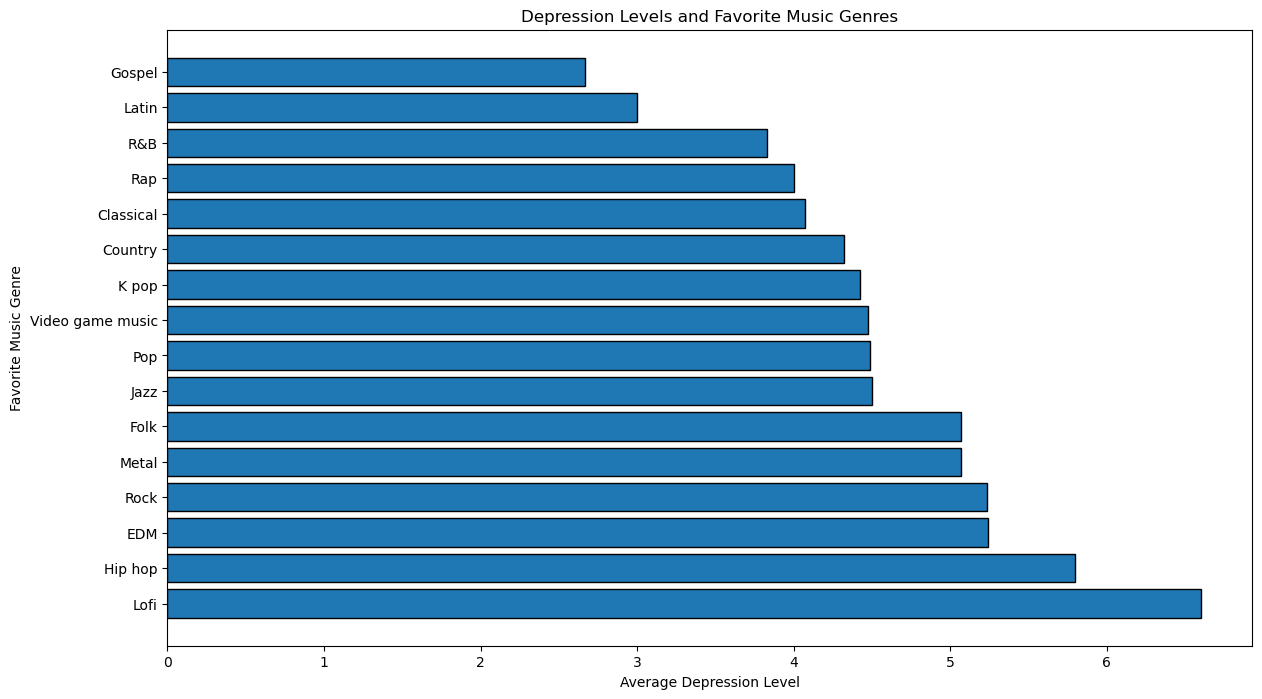

In [10]:
# grouping favorite genre by depression levels
depression = mental_data.groupby('Fav genre')['Depression'].mean().sort_values(ascending=False).reset_index()

# plotting a bar graph showing favorite genre and depression levels
plt.figure(figsize=(14, 8))
plt.barh(y='Fav genre', width='Depression', data=depression,  edgecolor='black')
plt.title('Depression Levels and Favorite Music Genres')
plt.xlabel('Average Depression Level')
plt.ylabel('Favorite Music Genre')
plt.show()

Here we see that Gospel has the lowest impact on high depression levels, while Lofi has a major affect. Latin also has a lower affect.

### 6. Bar Graph of Favorite Genre and Insomnia Level

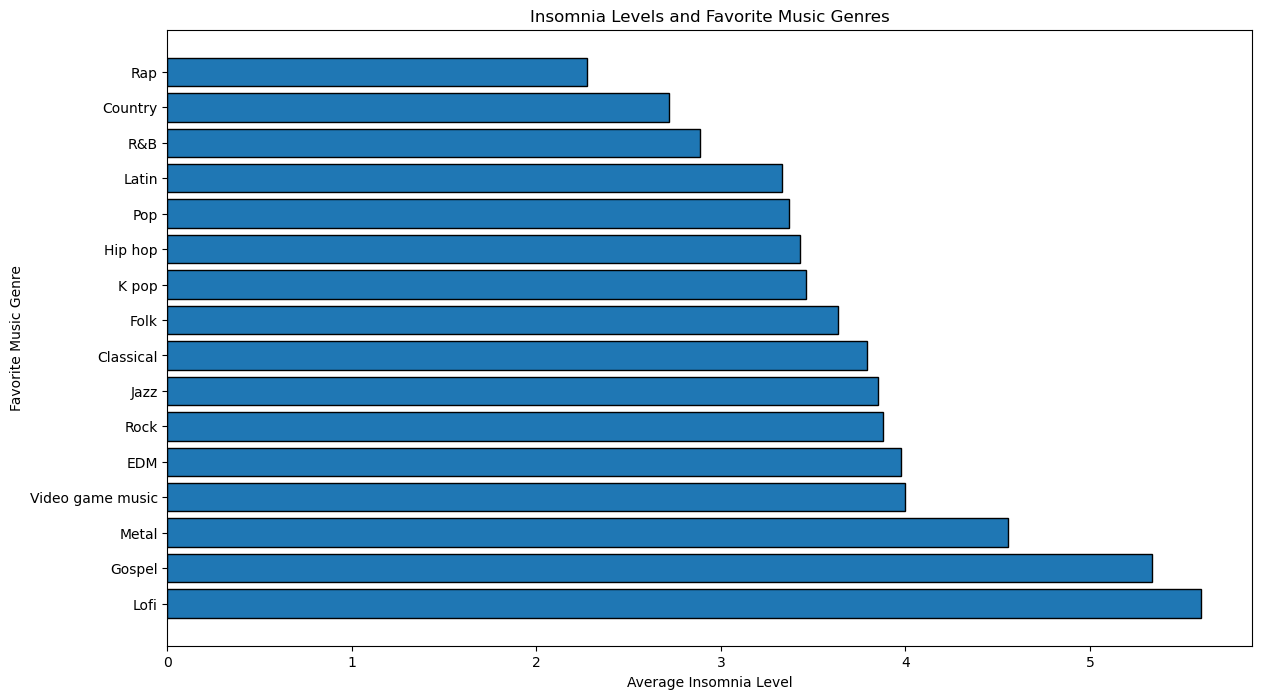

In [11]:
# grouping favorite genre by insomnia levels
insomnia = mental_data.groupby('Fav genre')['Insomnia'].mean().sort_values(ascending=False).reset_index()

# plotting a bar graph showing favorite genre and insomnia levels
plt.figure(figsize=(14, 8))
plt.barh(y='Fav genre', width='Insomnia', data=insomnia,  edgecolor='black')
plt.title('Insomnia Levels and Favorite Music Genres')
plt.xlabel('Average Insomnia Level')
plt.ylabel('Favorite Music Genre')
plt.show()

I found it suprising that Rap music is the lowest for insomnia levels. Lofi and Gospel are the highest for insomnia.

### 7. Bar Graph of Favorite Genre and OCD Level

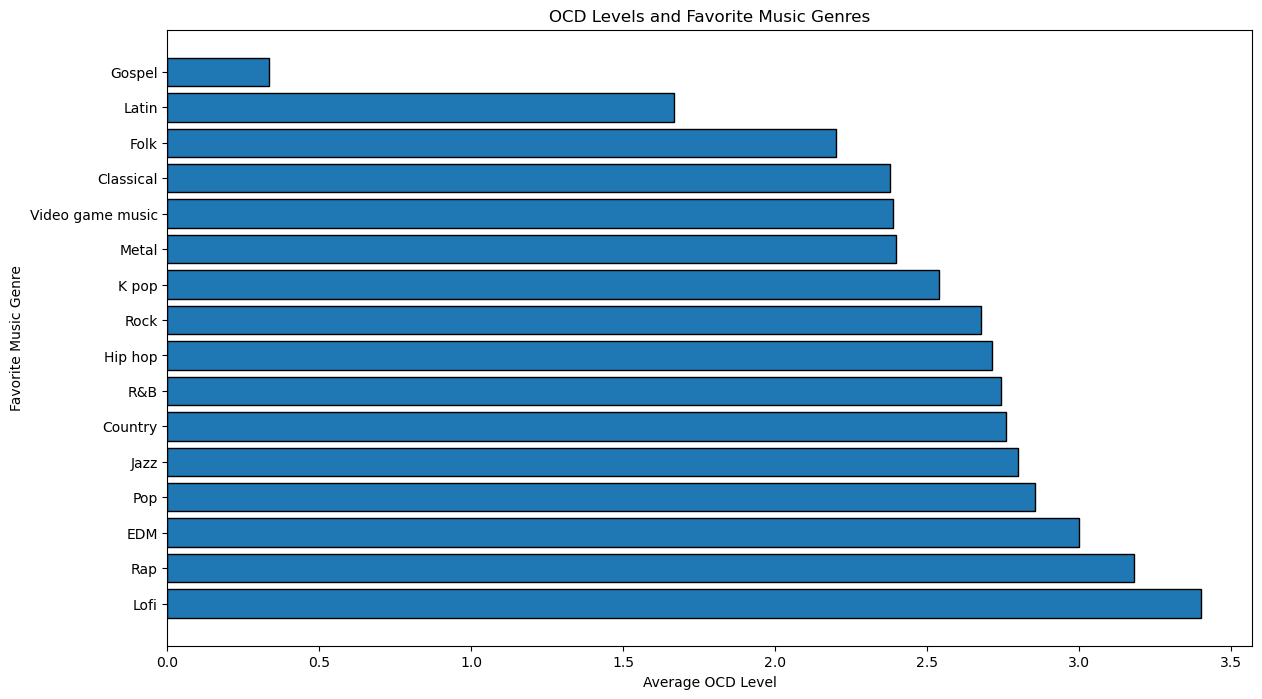

In [12]:
# grouping favorite genre by OCD levels
ocd = mental_data.groupby('Fav genre')['OCD'].mean().sort_values(ascending=False).reset_index()

# plotting a bar graph showing favorite genre and OCD levels
plt.figure(figsize=(14, 8))
plt.barh(y='Fav genre', width='OCD', data=ocd,  edgecolor='black')
plt.title('OCD Levels and Favorite Music Genres')
plt.xlabel('Average OCD Level')
plt.ylabel('Favorite Music Genre')
plt.show()

Here we see that Gospel has a significant impact on low OCD levels. Lofi however causes it to increase.

### Conclusion

The initial analysis shows that music does have an affect on our mental health. These results however are skewed towards those under 30 years of age as that is where the majority of respondents fell. We also learned that listening to at least 2 hours of music a day may be the best range for maximum affect on our mental health. Mental Hospitals often use music therapy in the rehabilitation and treatment of patients. Gospel music proves to be very effective for lowering Anxiety, Depression, and OCD but alternately is bad for insomnia. Lofi on the other hand proves to be bad for all types of mental health.

Further exploratory data analysis and cleaning will need to be completed to progress towards a working model that is useful.

### Milestone #2

In [13]:
mental_data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### 1. Renaming columns

In this milestone, we will prepare the data for optimal analysis. First, I started by renaming some column names. The original data had columns labeled "Frequency [Classical]", "Frequency [EDM]" etc. I renamed those so that it only shows the genre of "Classical" or "EDM

In [14]:
# leaving only the text between [] in column names using for loop
for col in mental_data.columns:
    if "[" in col and "]" in col:
        new_name = col.split("[")[1].split("]")[0]
        mental_data.rename(columns={col: new_name}, inplace=True)
        
mental_data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,R&B,Rap,Rock,Video game music,Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### 2. Deleting unnecessary columns

There are some columns that are unnecessary to our model. I will delete the Timestamp and Permissions columns as unnecesary. I will also remove Instrumentalist, Composer, Exploratory, and Foreign Languages columns as irrelevant to my intended model. These columns are not well defined to be able to truly glean data from.

In [15]:
# List of columns to delete
columns_to_delete = ["Timestamp", "Permissions", "Exploratory", "Foreign languages", "Instrumentalist", "Composer"]

# Drop the columns
mental_data.drop(columns=columns_to_delete, inplace=True)

mental_data.head()

,Age,Primary streaming service,Hours per day,While working,Fav genre,BPM,Classical,Country,EDM,Folk,...,Pop,R&B,Rap,Rock,Video game music,Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Latin,156.0,Rarely,Never,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,Rock,119.0,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,Video game music,132.0,Never,Never,Very frequently,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,R&B,107.0,Never,Never,Rarely,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


### 3. Fill in missing values with average in Age, Hours Per Day, BPM, and music effects columns

The Beats Per Minute column has a lot of blank cells. I will replace those with the average BPM for the column. I will do the same for Age and Hours Per Day listened.

In [16]:
# Calculate the averages
average_bpm = mental_data['BPM'].mean()
average_age = mental_data['Age'].mean()
average_hours = mental_data['Hours per day'].mean()

# Fill blanks with the averages
mental_data['BPM'].fillna(average_bpm, inplace=True)
mental_data['Age'].fillna(average_age, inplace=True)
mental_data['Hours per day'].fillna(average_hours, inplace=True)

### 4. Converting categorical columns to dummy variables

Using .getdummies to convert the categorical columns into dummy variables to allow for better analysis.

In [17]:
mental_data = pd.get_dummies(mental_data)
mental_data.head()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,...,Rock_Rarely,Rock_Sometimes,Rock_Very frequently,Video game music_Never,Video game music_Rarely,Video game music_Sometimes,Video game music_Very frequently,Music effects_Improve,Music effects_No effect,Music effects_Worsen
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,False,False,False,...,True,False,False,False,False,False,True,False,True,False
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,False,False,False,...,False,False,False,False,True,False,False,True,False,False


## Milestone #3

First I had to split the data into a test and training set. I did this based on the Music effects_Improve column. 

In [18]:
# splitting data into a test and training set
X = mental_data.drop(columns=['Music effects_Improve'])
y = mental_data['Music effects_Improve']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes Classifier

I tried three models. First a Naive Bayes classifier

In [19]:
# Initializing the Naive Bayes classifier
bayes_classifier = GaussianNB()

# Fitting the model to the training set
bayes_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = bayes_classifier.predict(X_test)

# Calculating metrics for accuracy, percision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Naive Bayes Classifier Metrics:")
print("Accuracy:", accuracy*100, "%")
print("Precision:", precision*100, "%")
print("Recall:", recall*100, "%")
print("F1-score:", f1*100, "%")

Naive Bayes Classifier Metrics:
Accuracy: 76.35135135135135 %
Precision: 76.35135135135135 %
Recall: 100.0 %
F1-score: 86.59003831417624 %


The accuracy came to 76.35% which is decent accuracy for a model. The percision of 76.35% shows the model predicts positively and is correct 76.35% of the time. The recall of 100% may be due to overfitting, but it shows that there were no false negatives and all actual positives were captured. The F1-score of 86.59% shows an overall good model. This is calculated by averging the recall and precision. As recall was 100% we would need to improve precision to reduce the false positives the model may return.

### KNN Classifier

Next, a KNN classifier using a pipeline with MinMaxScaler.

In [20]:
# define the pipeline
pipeline = Pipeline([('scaler', MinMaxScaler()), ('classifier', KNeighborsClassifier())])

# Fit the pipeline to the training set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# calculate and print accuract
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the default KNN classifier on the test set:", accuracy*100, "%")

Accuracy of the default KNN classifier on the test set: 75.0 %


The initial accuracy score was only 75%. While this is a good score for the model, it is not as accurate as our Naive Bayes model. 

Next, we will add hyperparameters to the pipeline to see if the score improves.

In [21]:
# Define the search space
param_grid = {'classifier__n_neighbors': np.arange(1, 21)}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit GridSearchCV to the training set
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_n = grid_search.best_params_['classifier__n_neighbors']

# Update the pipeline with the best parameter
pipeline.set_params(classifier__n_neighbors=best_n)

# Fit the updated pipeline to the training set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("KNN Classifier Metrics:")
print("Accuracy:", accuracy*100, "%")
print("Precision:", precision*100, "%")
print("Recall:", recall*100, "%")
print("F1-score:", f1*100, "%")
print("Best N value parameter found:", best_n)

KNN Classifier Metrics:
Accuracy: 81.08108108108108 %
Precision: 81.48148148148148 %
Recall: 97.34513274336283 %
F1-score: 88.70967741935483 %
Best N value parameter found: 12


With the added parameters, our accuracy has now increased to 81% which is better than the previous Naive Bayes model. The precision is slightly better at 81.48%. Recall is 97.34%, and the F-1 score is 88.71%. We also learned that the best N value for the clusters is 12. So far, this model is the most accurate and best fit for the data.

### Decision Tree Classifier

Finally, a Decision Tree classifier

In [22]:
# Initializing the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fitting the model to the training set
tree_classifier.fit(X_train, y_train)

# Predicting on the test data
y_pred = tree_classifier.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy*100, "%")
print("Precision:", precision*100, "%")
print("Recall:", recall*100, "%")
print("F1-score:", f1*100, "%")

Decision Tree Classifier Metrics:
Accuracy: 98.64864864864865 %
Precision: 100.0 %
Recall: 98.23008849557522 %
F1-score: 99.10714285714286 %


The accuracy came to 98.64% which is a fantastic accuracy for a model. The percision of 100% shows the model predicts positively and is correct 100% of the time. This may be due to overfitting and should be reviewed. The recall of 98.23% shows that there were few false negatives and most actual positives were captured. The F1-score of 99.10% shows an overall great model. This is calculated by averging the recall and precision.

### Overview

This data fits best in a decision tree model. While a KNN Classifier and Naive Bayes were also possible choices with more than acceptable accuracy scores. 

I also tried logistic regression (100% accurate due to overfitting), and Random Forest Classifier (27% accuracy). I did not include either as both were unusable due to overfitting or extremely poor accuracy.